Problem Statement

In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season. A look at the data Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season. Download 'nba_2013.csv' file from this link: https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0 Here are some selected columns from the data: player - name of the player pos - the position of the player g - number of games the player was in gs - number of games the player started pts - total points the player scored There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them.

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load dataset
nba = pd.read_csv("nba_2013.csv")

In [4]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [5]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [6]:
nba = nba.iloc[:,1:29]

In [7]:
nba = nba.drop("bref_team_id", axis =1)

In [8]:
# dependant and independant variables
X = nba.iloc[:,:-1].values
y = nba.iloc[:,-1].values

In [9]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:,[7,10,13,14,17]])
X[:,[7,10,13,14,17]] = imputer.transform(X[:,[7,10,13,14,17]])

C:\Users\manug\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
#Label encoding categorical value
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()

#Implementing dummy trap
X= X[:,1:]

C:\Users\manug\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\manug\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [12]:
#Splitting the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
#Applying Algorithm KNN to the training dataset
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors=5, metric= "minkowski", p =2)
classifier.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

Text(0.5, 1.0, 'Actual Pts vs Predicted Pts')

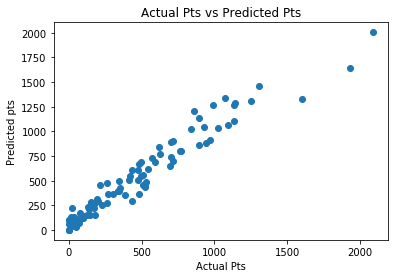

In [15]:
#Predicting the test data
y_pred = classifier.predict(X_test)

#Plotting the scatter plots
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Pts")
plt.ylabel("Predicted pts")
plt.title("Actual Pts vs Predicted Pts")